In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("placement.csv")

In [4]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
df=df.iloc[:,1:]

In [7]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [11]:
import matplotlib.pyplot as plt

C:\Users\91996\AppData\Local\Temp\ipykernel_160808\4169156375.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


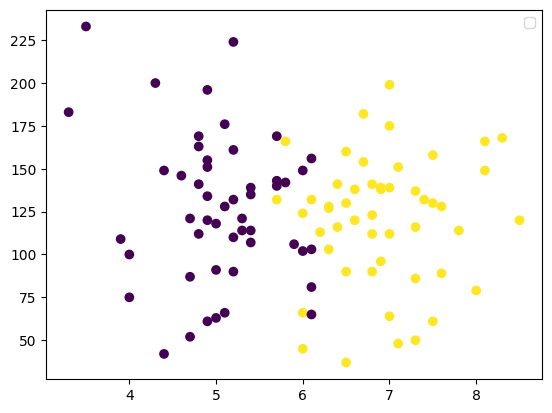

In [15]:
plt.scatter(df.cgpa,df.iq,c=df.placement)
plt.legend()
plt.show()


In [16]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [17]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [18]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)

In [22]:
X_train.shape


(80, 2)

In [23]:
X_test.shape


(20, 2)

In [24]:
Y_train.shape


(80,)

In [25]:
Y_test.shape

(20,)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)

In [30]:
X_train

array([[ 0.75454157, -0.7814775 ],
       [ 1.01361164, -1.80957633],
       [-1.0589489 , -1.71166216],
       [-0.88623553,  0.29557841],
       [ 0.49547151, -0.7814775 ],
       [ 0.92725495, -1.41791964],
       [ 0.5818282 , -0.0471212 ],
       [ 0.49547151,  0.19766424],
       [-0.10902532,  1.07889181],
       [ 0.06368806,  0.05079298],
       [-0.62716546,  0.95649909],
       [ 0.66818488,  0.78514929],
       [ 1.18632502,  0.36901404],
       [ 0.84089826, -0.63460624],
       [-0.88623553,  1.81324812],
       [-0.45445208,  0.32005696],
       [ 1.18632502, -0.87939168],
       [-0.71352215,  1.32367724],
       [-1.40437566,  1.91116229],
       [-0.02266863, -0.38982081],
       [ 0.5818282 ,  0.39349259],
       [ 0.92725495, -0.24294954],
       [ 0.49547151, -2.07884031],
       [-0.19538201,  0.44244968],
       [ 1.18632502, -1.76061925],
       [ 0.92725495,  1.2991987 ],
       [ 0.06368806, -1.36896255],
       [-0.10902532,  0.49140676],
       [-0.54080877,

In [31]:
X_test=scaler.transform(X_test)

In [32]:
X_test

array([[-0.62716546,  0.24662133],
       [ 0.84089826,  0.39349259],
       [ 0.49547151,  0.93202055],
       [-0.79987884, -0.09607828],
       [-0.88623553, -1.49135527],
       [ 1.27268171,  0.24662133],
       [ 0.92725495,  1.88668375],
       [ 0.06368806,  0.66275657],
       [-0.88623553,  0.80962783],
       [-0.45445208, -0.36534226],
       [ 1.3590384 , -1.49135527],
       [-0.19538201,  0.24662133],
       [ 1.87717854,  1.07889181],
       [ 0.23640144, -0.218471  ],
       [ 1.79082185, -1.05074148],
       [ 0.32275813,  0.12422861],
       [ 0.40911482, -0.14503537],
       [-0.88623553,  0.71171365],
       [ 0.92725495,  0.41797113],
       [-0.19538201,  1.15232744]])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf=LogisticRegression()


In [35]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [38]:
y_pred=clf.predict(X_test)

In [39]:
Y_test

19    0
11    1
38    1
67    0
73    0
3     1
26    1
33    0
76    0
81    0
44    1
87    1
65    1
99    1
58    1
70    1
13    1
89    0
32    1
84    0
Name: placement, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(Y_test,y_pred)

0.95

In [45]:
#plotting decision boundary
from mlxtend.plotting import plot_decision_regions

<Axes: >

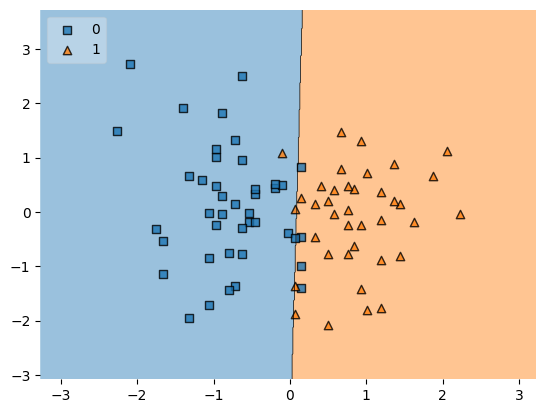

In [49]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [50]:
import pickle

In [51]:
pickle.dump(clf,open('model.pkl','wb'))